<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР. <b>Деревья решений и их ансамбли</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Дерево решений</a>
        <li><a href="#2">Ансамбль деревьев</a>
        <li><a href="#3">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подлючение библиотек</b></p>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from sklearn.datasets import make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [5]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
    ExtraTreesClassifier,
    ExtraTreesRegressor
)

In [6]:
import sys
sys.path.insert(0, "../lib/")
from plot_utils import CPlot, RPlot

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:16pt; font-weight:bold">1. Дерево решений</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

### Классификация

In [7]:
CLR_MAP = ListedColormap(["blue", "red", "green"])

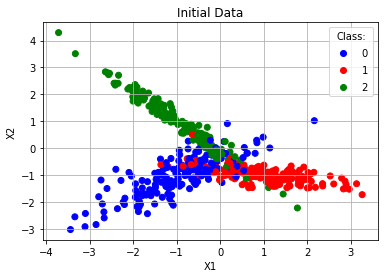

Time =  0.010690450668334961
Test Score =  0.88
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.81      0.80        37
     Class 1       0.92      0.86      0.89        56
     Class 2       0.90      0.95      0.92        57

    accuracy                           0.88       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.88      0.88      0.88       150



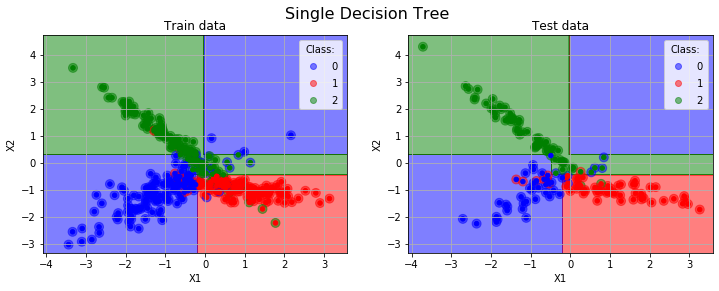

In [8]:
# Исходные данные
n = 500
X, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
CPlot.show_init_data_plot(X, y, cmap=CLR_MAP)

# Формирование обучающего и тестового подмножеств
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Обучение
tick = time.time()
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dt_model.fit(X_train, y_train)
print("Time = ", time.time()-tick)

# Проверка на тестовом подмножестве
score_dt_model = dt_model.score(X_test, y_test)
print("Test Score = ", score_dt_model)
print("Classification Report:")
print(classification_report(y_test, dt_model.predict(X_test), target_names=["Class 0", "Class 1", "Class 2"]))

# Графики
CPlot.show_train_test_plots(dt_model, X_train, y_train, X_test, y_test, 
                            title="Single Decision Tree", cmap=CLR_MAP)

Структура дерева

In [9]:
dt_model.tree_

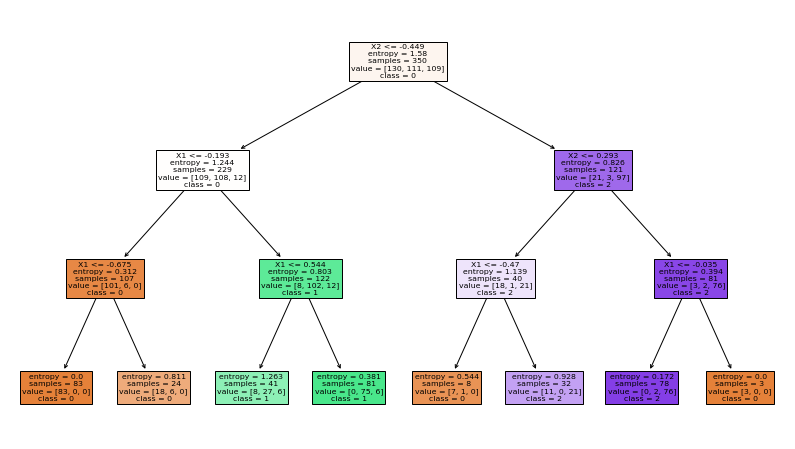

In [10]:
plt.figure(1, figsize=[14, 8])
plot_tree(dt_model, filled=True, feature_names=["X1", "X2"], class_names=["0", "1", "2"])
plt.show()

### Регрессия

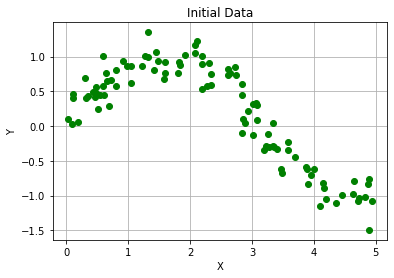

Time = 0.0014853477478027344
R^2 = 0.8245312480852167


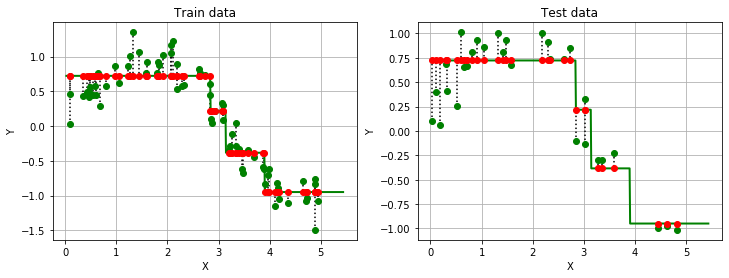

In [11]:
# Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

RPlot.show_init_data_plot(x,y)

# Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train = x_train[:, np.newaxis]
X_test = x_test[:, np.newaxis]

# Обучение
tick = time.time()
dtr_model = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=0)
dtr_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_dtr_model = dtr_model.score(X_test, y_test)
print("R^2 =", score_dtr_model)

# Графики
RPlot.show_train_test_plots(dtr_model, X_train, y_train, X_test, y_test)

Структура дерева

In [12]:
dtr_model.tree_

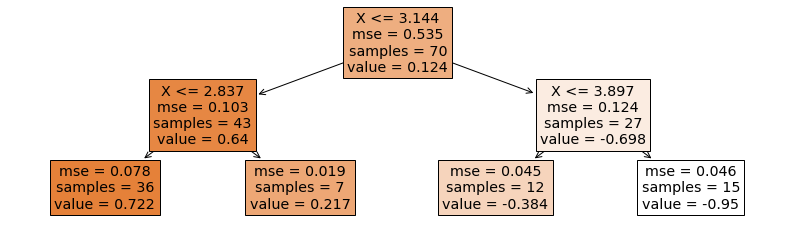

In [13]:
plt.figure(1, figsize=[14, 4])
plot_tree(dtr_model, filled=True, feature_names=["X"])
plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:16pt; font-weight:bold">2. Ансамбль деревьев</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

### Классификация

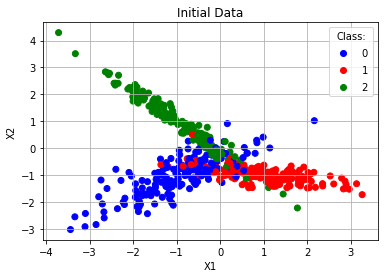

In [14]:
# Исходные данные
n = 500
X, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)
CPlot.show_init_data_plot(X, y, cmap=CLR_MAP)

In [15]:
# Формирование обучающего и тестового подмножеств
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Дерево решений

In [16]:
# Обучение
tick = time.time()
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_dt_model = dt_model.score(X_test, y_test)
print("Test Score = ", score_dt_model)

Time = 0.012153863906860352
Test Score =  0.82


#### Бэггинг

[BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [17]:
# Обучение
tick = time.time()
dt_model_inner = DecisionTreeClassifier(criterion="entropy", random_state=0)

bagging_model = BaggingClassifier(base_estimator=dt_model_inner, n_estimators=10, 
                                  max_samples=1.0, max_features=1.0, bootstrap=True, 
                                  bootstrap_features=False, oob_score=False, random_state=0)
bagging_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_bagging_model = bagging_model.score(X_test, y_test)
print("Test Score = ", score_bagging_model)

Time = 0.064697265625
Test Score =  0.8666666666666667


#### Случайный лес 

[RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [18]:
# Обучение
tick = time.time()
rf_model = RandomForestClassifier(n_estimators=10, criterion="entropy", bootstrap=True, 
                                  oob_score=False, random_state=0)
rf_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_rf_model = rf_model.score(X_test, y_test)
print("Test Score = ", score_rf_model)

Time = 0.03673434257507324
Test Score =  0.8466666666666667


#### Extra Trees

[ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [19]:
# Обучение
tick = time.time()
et_model = ExtraTreesClassifier(n_estimators=10, criterion="entropy", bootstrap=True, 
                                oob_score=False, random_state=0)
et_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_et_model = et_model.score(X_test, y_test)
print("Test Score = ", score_et_model)

Time = 0.057097434997558594
Test Score =  0.88


#### Графики

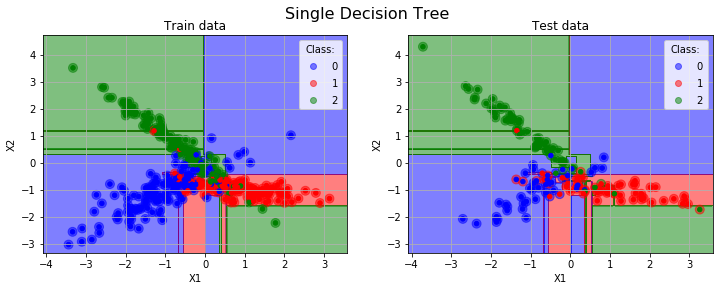

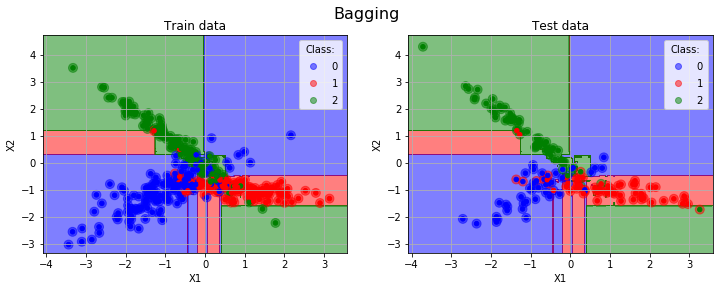

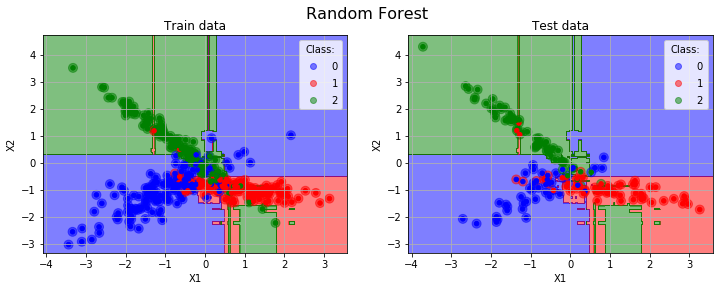

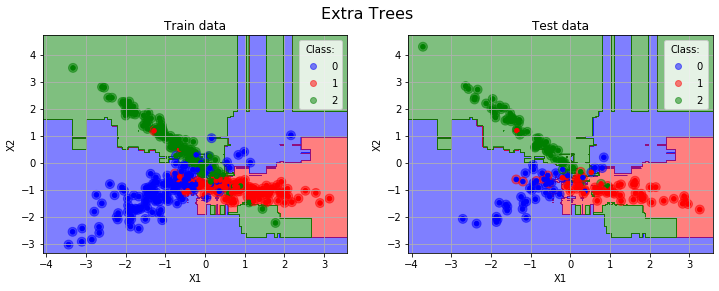

In [20]:
CPlot.show_train_test_plots(dt_model, X_train, y_train, X_test, y_test, title="Single Decision Tree", cmap=CLR_MAP)
CPlot.show_train_test_plots(bagging_model, X_train, y_train, X_test, y_test, title="Bagging", cmap=CLR_MAP)
CPlot.show_train_test_plots(rf_model, X_train, y_train, X_test, y_test, title="Random Forest", cmap=CLR_MAP)
CPlot.show_train_test_plots(et_model, X_train, y_train, X_test, y_test, title="Extra Trees", cmap=CLR_MAP)

### Регрессия

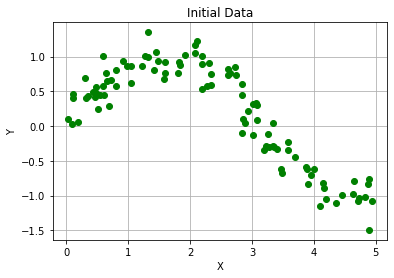

In [21]:
# Исходные данные
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

RPlot.show_init_data_plot(x, y)

In [22]:
# Формирование обучающего и тестового подмножеств
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train = x_train[:, np.newaxis]
X_test = x_test[:, np.newaxis]

#### Дерево решений

In [23]:
# Обучение
tick = time.time()
dtr_model = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=0)
dtr_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_dtr_model = dtr_model.score(X_test, y_test)
print("R^2 =", score_dtr_model)

Time = 0.002777576446533203
R^2 = 0.8245312480852167


#### Бэггинг

[BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

In [24]:
# Обучение
tick = time.time()
dtr_model_inner = DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=0)
baggingr_model = BaggingRegressor(base_estimator=dtr_model_inner, n_estimators=10, max_samples=1.0, 
                                  max_features=1.0, bootstrap=True, bootstrap_features=False, 
                                  oob_score=False, random_state=0)
baggingr_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_baggingr_model = baggingr_model.score(X_test, y_test)
print("R^2 =", score_baggingr_model)

Time = 0.026214122772216797
R^2 = 0.8560427140940123


#### Случайный лес 

[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [25]:
# Обучение
tick = time.time()
rfr_model = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True,
                                  oob_score=False, random_state=0)
rfr_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_rfr_model = rfr_model.score(X_test, y_test)
print("R^2 =", score_rfr_model)

Time = 0.030034303665161133
R^2 = 0.8560783595175903


#### Extra Trees

[ExtraTreesRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

In [26]:
# Обучение
tick = time.time()
etr_model = ExtraTreesRegressor(n_estimators=10, max_depth=10, criterion="mse", bootstrap=True, 
                                    oob_score=False, random_state=0)
etr_model.fit(X_train, y_train)
print("Time =", time.time()-tick)

# Проверка на тестовом подмножестве
score_etr_model = etr_model.score(X_test, y_test)
print("R^2 =", score_etr_model)

Time = 0.03031134605407715
R^2 = 0.8669293038785268


#### Графики

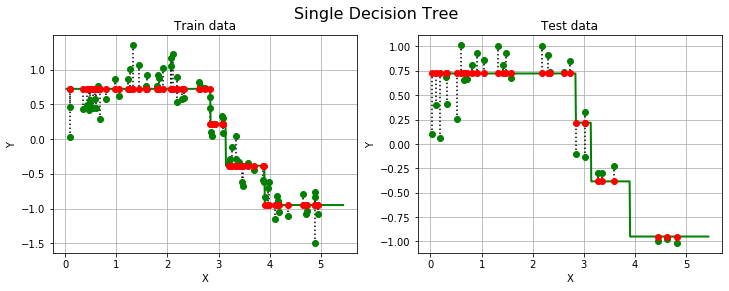

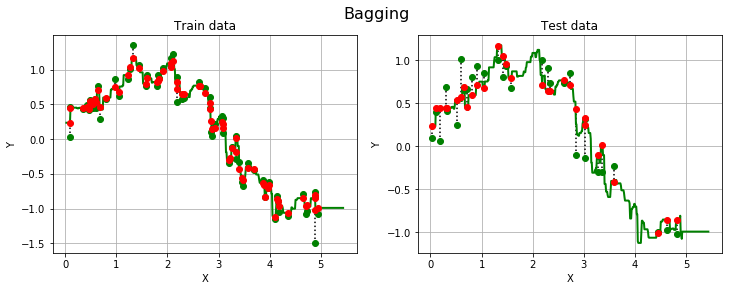

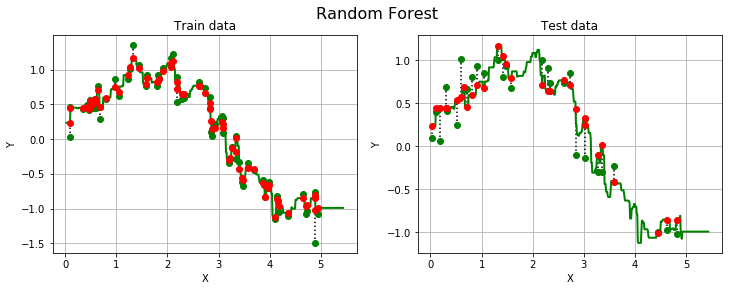

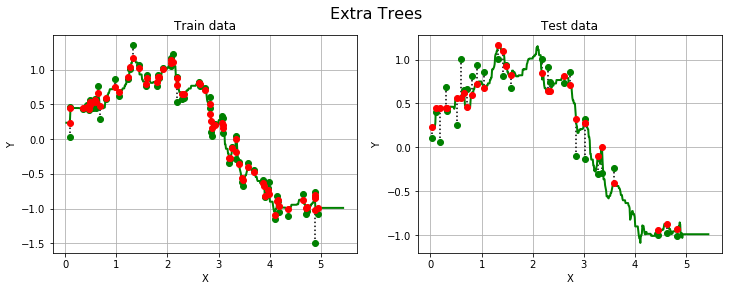

In [27]:
RPlot.show_train_test_plots(dtr_model, X_train, y_train, X_test, y_test, title="Single Decision Tree")
RPlot.show_train_test_plots(baggingr_model, X_train, y_train, X_test, y_test, title="Bagging")
RPlot.show_train_test_plots(rfr_model, X_train, y_train, X_test, y_test, title="Random Forest")
RPlot.show_train_test_plots(etr_model, X_train, y_train, X_test, y_test, title="Extra Trees")

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/tree.html">Decision Trees</a><br>
<a href="http://scikit-learn.org/stable/modules/ensemble.html">Ensemble methods</a><br>
<a href="http://nbviewer.jupyter.org/github/arundhaj/datamining_class/blob/master/decision_tree.ipynb">DecisionTree Classification</a>